   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0            

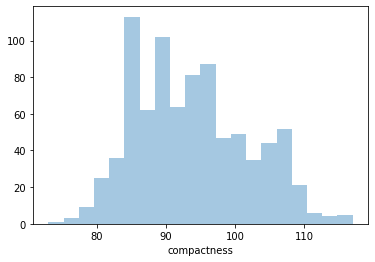

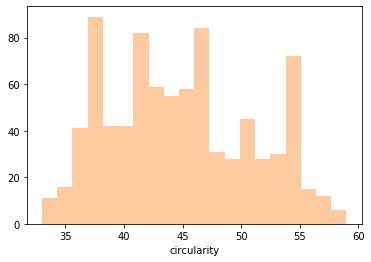

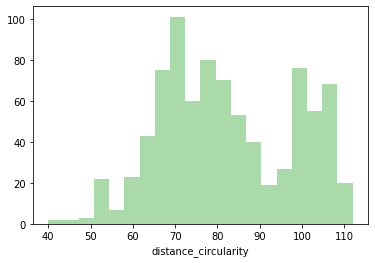

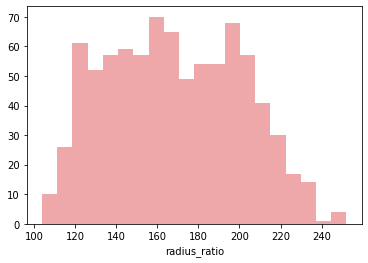

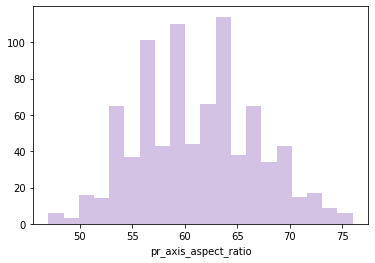

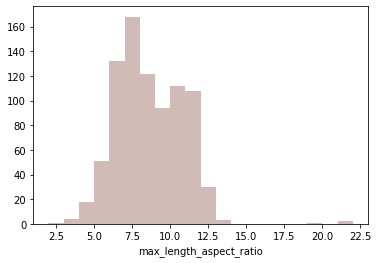

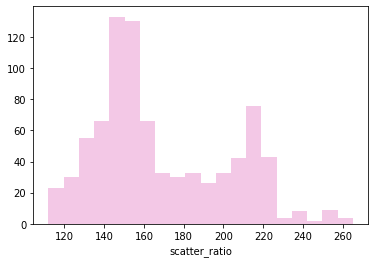

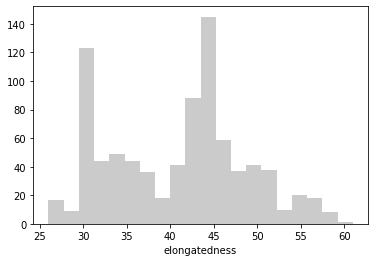

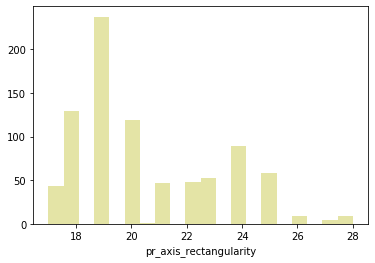

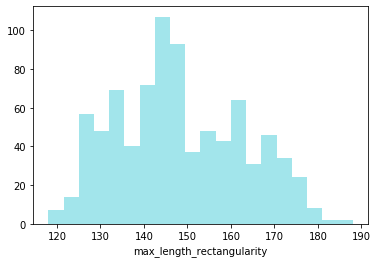

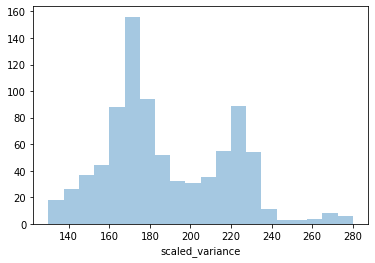

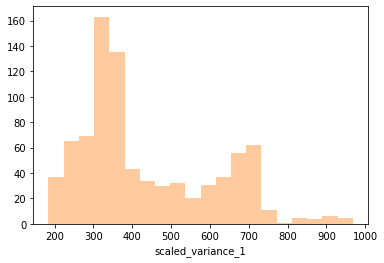

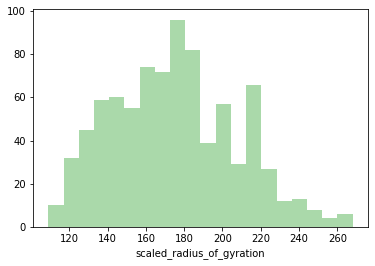

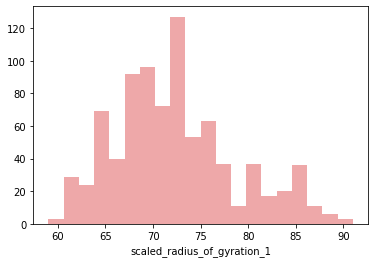

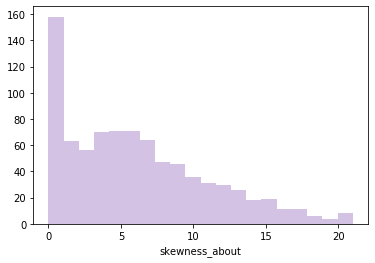

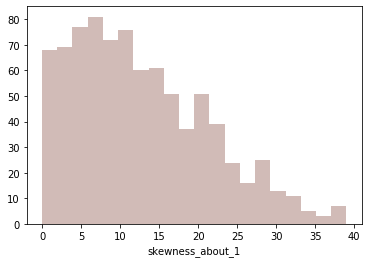

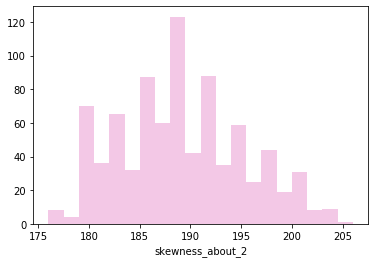

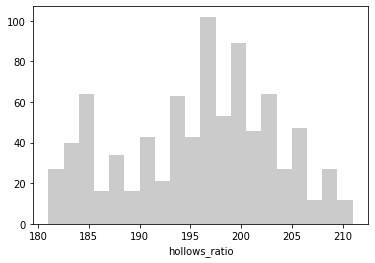

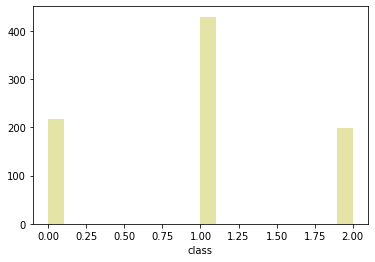

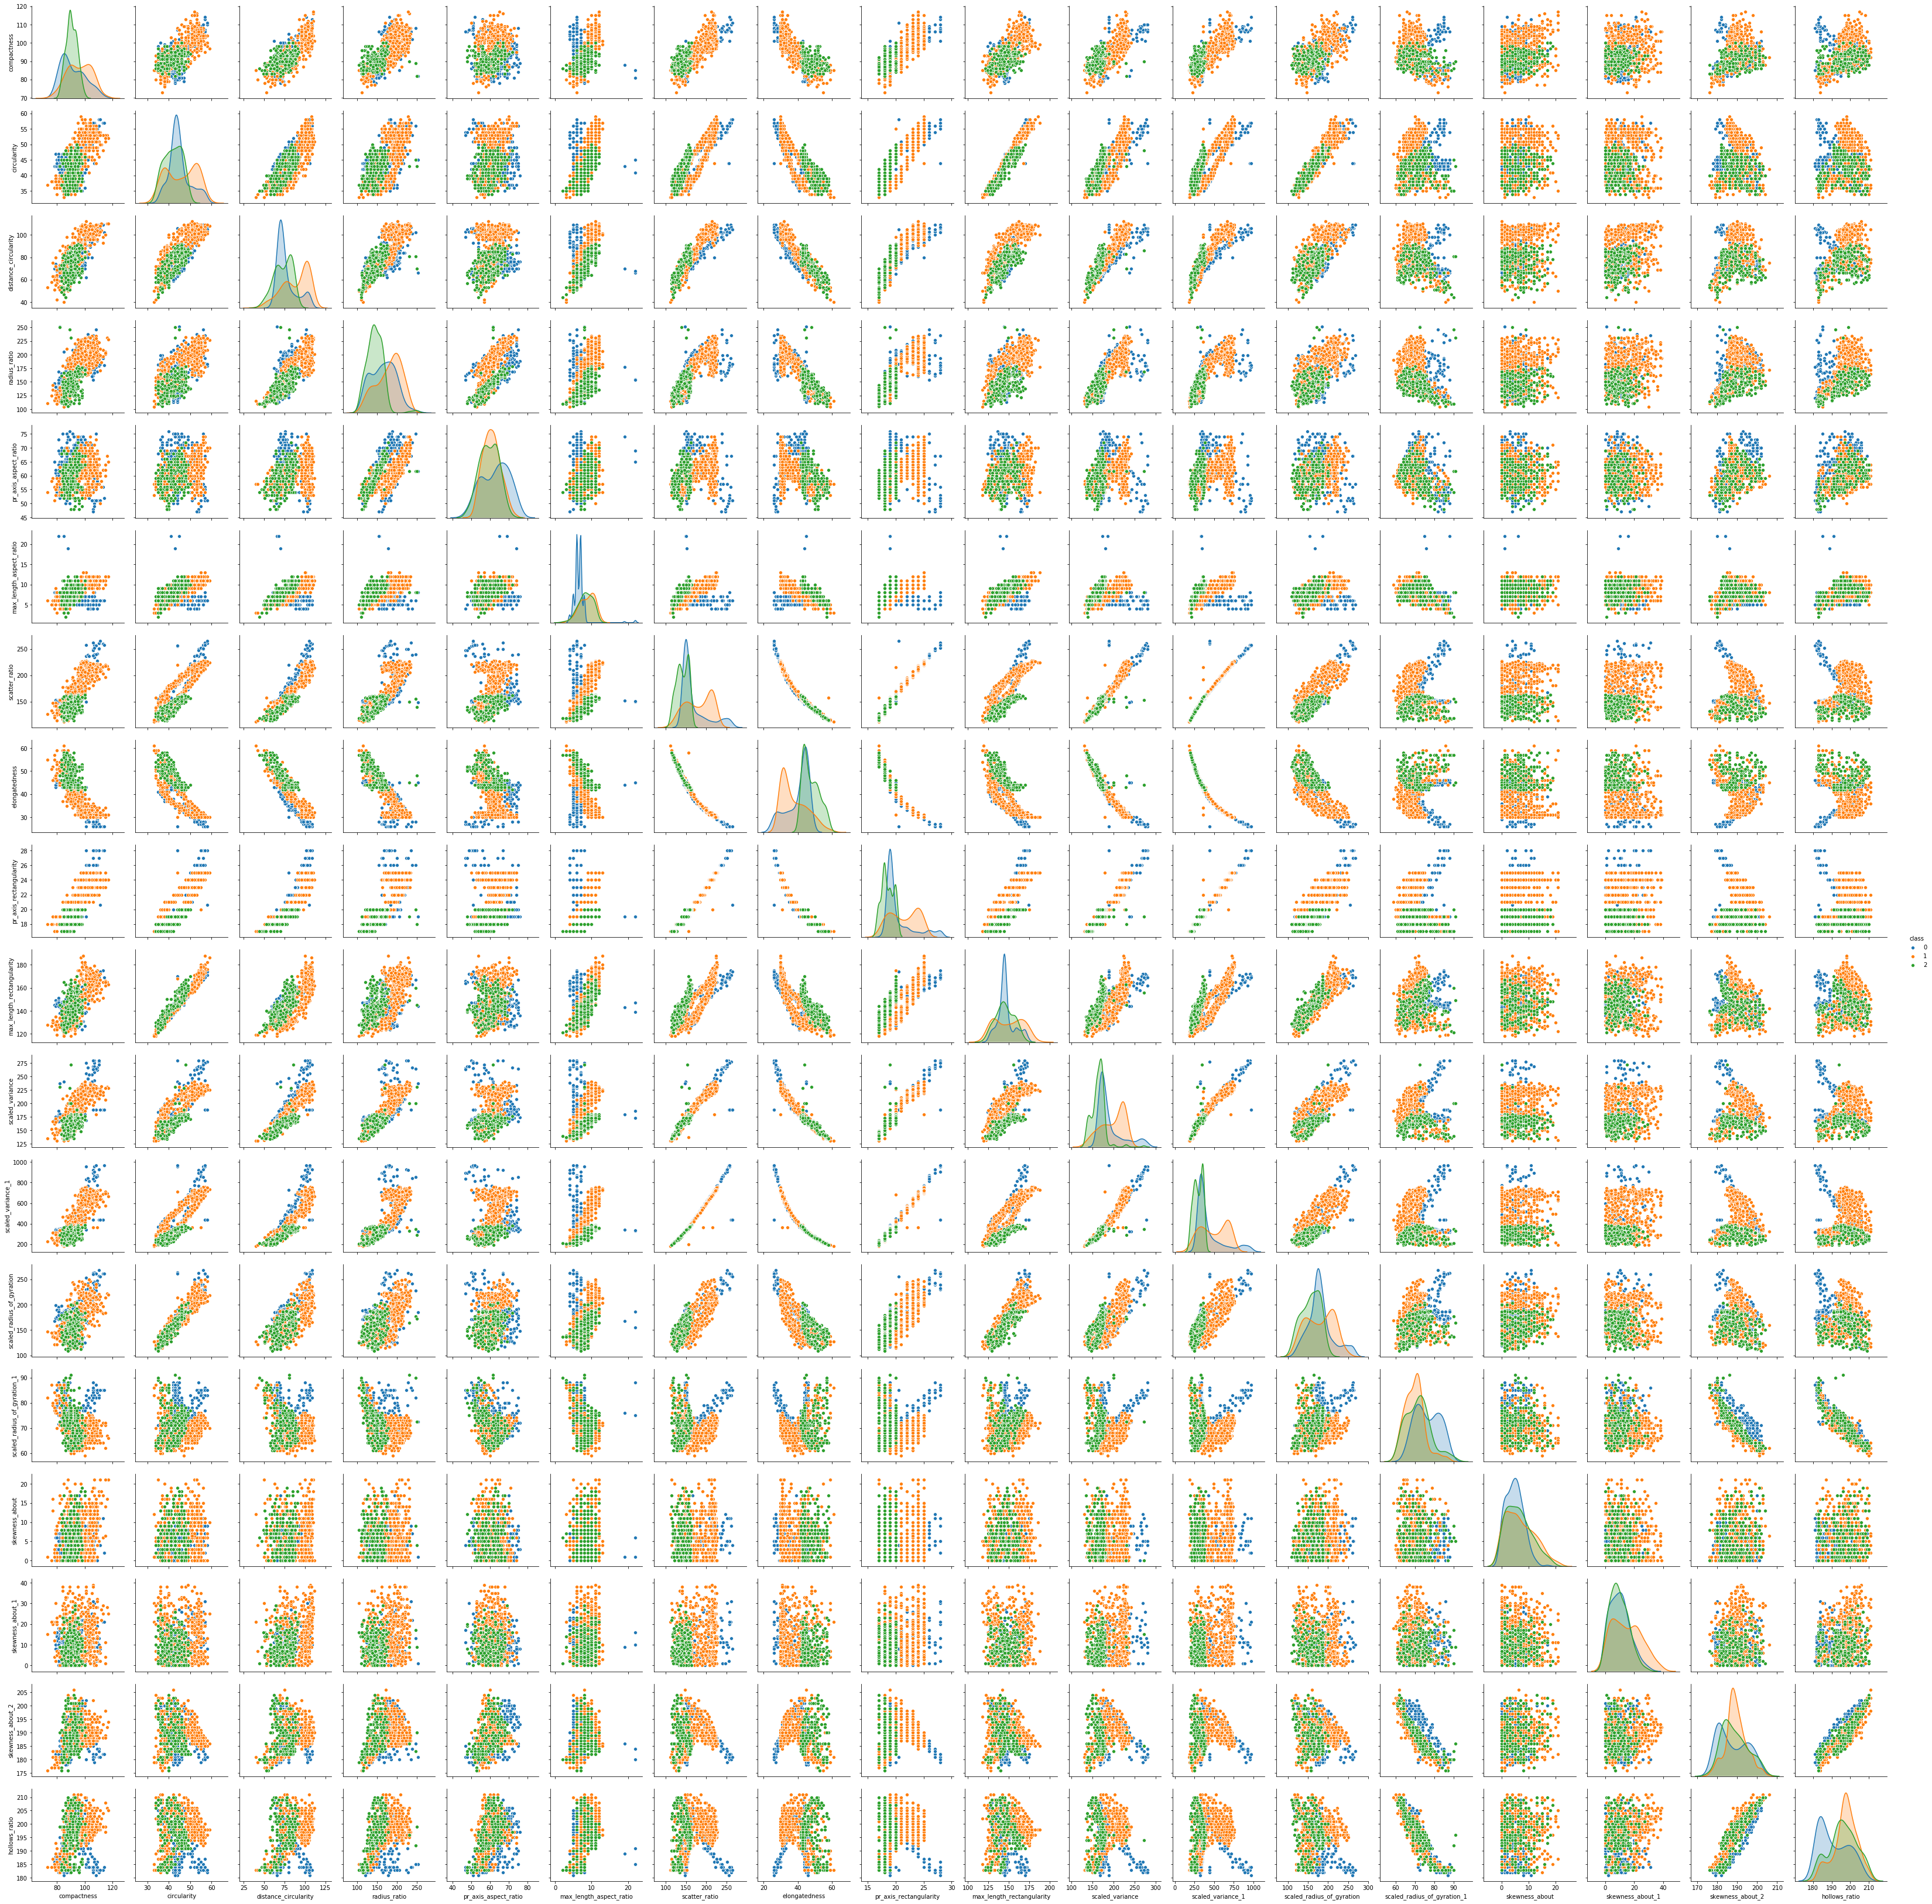

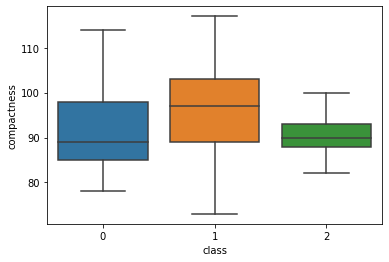

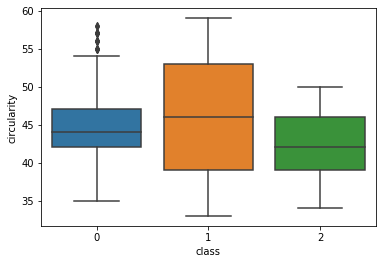

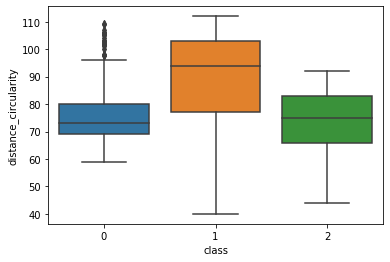

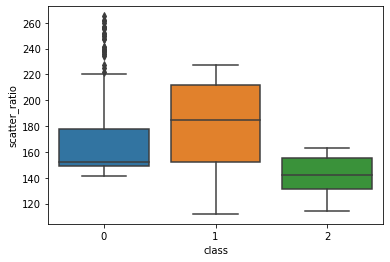

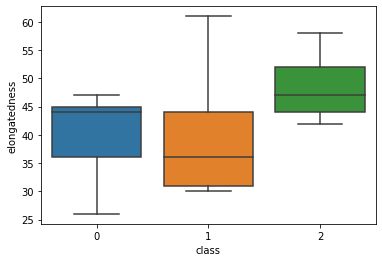

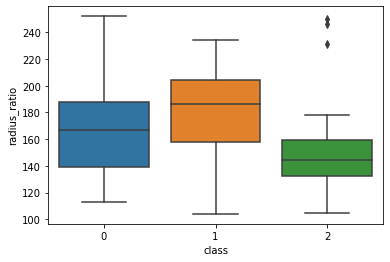

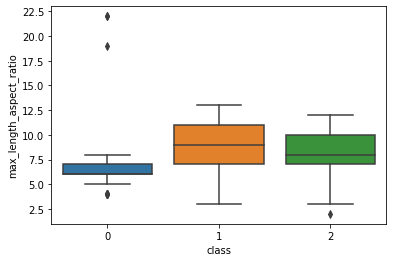

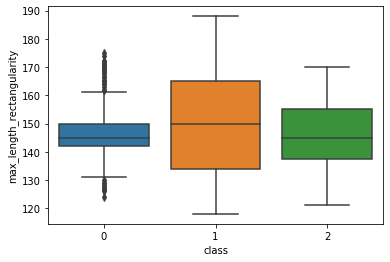

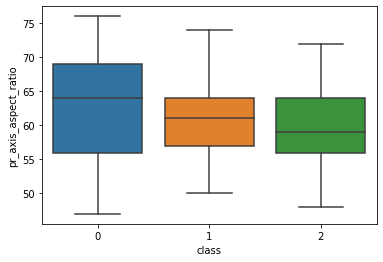

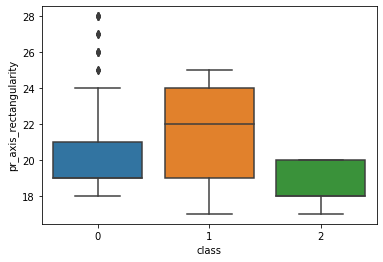

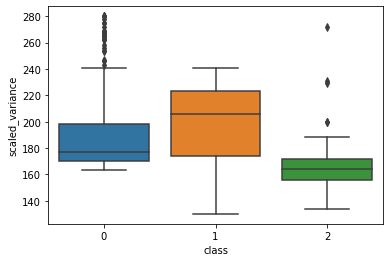

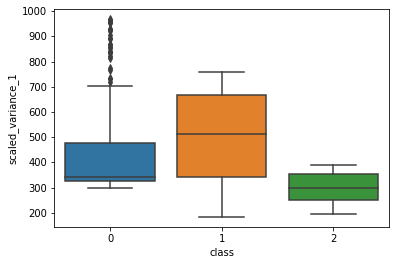

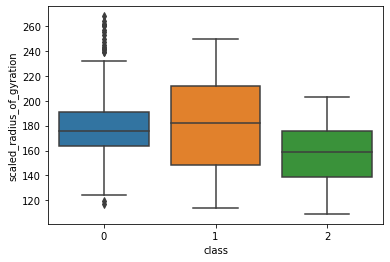

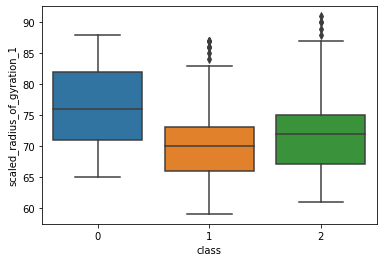

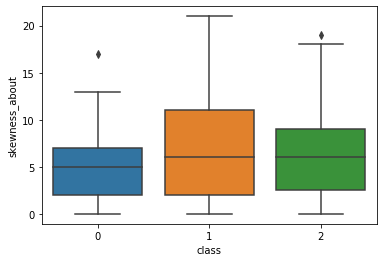

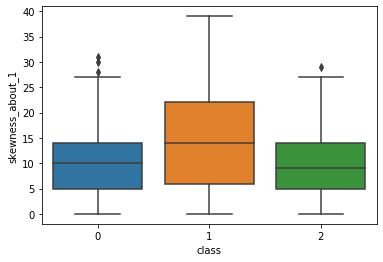

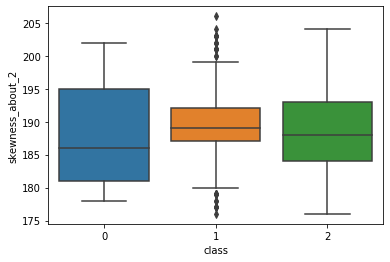

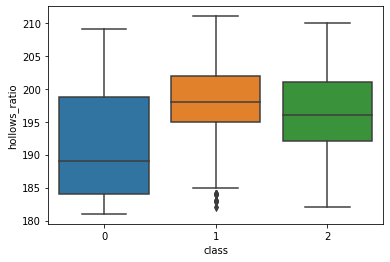

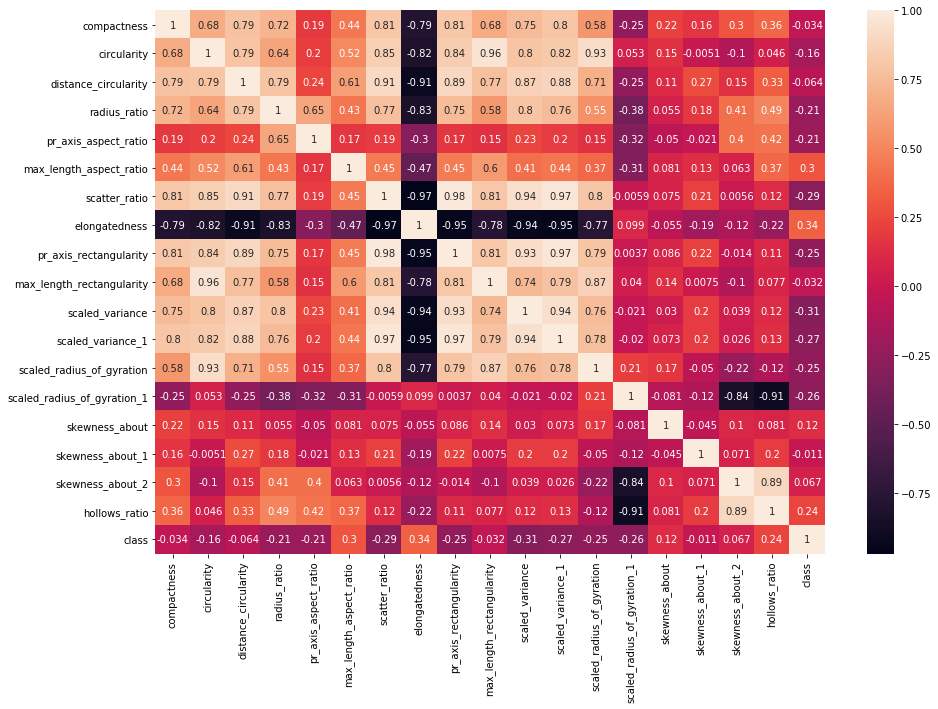

                          Specs         Score
11            scaled_variance_1  12667.897087
6                 scatter_ratio   1255.573812
3                  radius_ratio   1029.863055
10              scaled_variance    869.782194
2          distance_circularity    502.862301
12    scaled_radius_of_gyration    454.017832
15             skewness_about_1    434.855218
7                 elongatedness    326.040858
14               skewness_about    107.837408
13  scaled_radius_of_gyration_1     89.273623
5       max_length_aspect_ratio     89.017448
0                   compactness     58.142863
8        pr_axis_rectangularity     56.563649
1                   circularity     47.685079
17                hollows_ratio     29.277924
9     max_length_rectangularity     24.425818
4          pr_axis_aspect_ratio     19.160038
16             skewness_about_2      2.106312
best params svc {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
prediction on test data using SVM [1 1 2 1 1 1 2 1 0 0 1 1 0 1 2

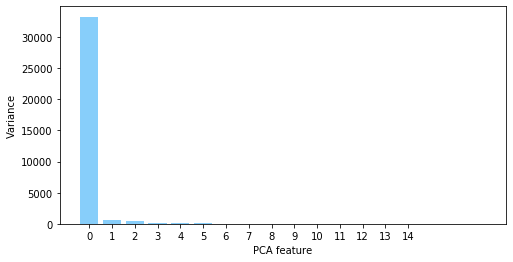

Explained variance is 
 [33251.09023108   578.38400003   436.67874858   107.9014998
    89.86891622    58.48465579    44.10178556    34.47358865
    24.86940305    21.31983098    12.06137472     7.87466768
     4.320246       2.9602998      1.70827858     1.2276979
     1.02962214     0.16495226]
prediction on test data using PCA SVM [1 1 2 1 1 1 2 1 0 0 1 1 0 1 2 1 1 2 2 1 1 0 2 1 0 0 1 1 2 1 2 1 0 1 2 0 0
 0 2 1 1 2 1 0 2 1 1 1 1 0 0 0 2 1 2 0 1 2 1 1 2 0 1 1 1 0 2 1 2 0 2 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 2 0 1 0 1 1 2 1 1 1 1 1 1 0 0 2 1 1 2 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 2 0 2 2 1 1 2 2 0 0 1 2 1 0 1 1 1 0 2 0 2 1
 2 1 0 1 0 1 1 1 1 2 1 0 2 1 0 2 1 2 1 0 1 0 2 1 1 1 1 2 1 0 2 2 1 2 1 2 0
 1 2 1 1 0 1 1 2 2 0 1 0 0 2 0 1 1 2 1 1 1 0 1 1 1 1 1 2 1 1 1 1 0 1 2 0 2
 1 1 2 0 1 2 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 2 2 2 1 1 1 1 1 1]
confusion_matrix of PCA SVC is 
  [[ 56   2   2]
 [  2 136   3]
 [  3   0  50]]
accuracy score of PCA SVC is 0.952755905511811
classification report

In [1]:


import pandas as pd, numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import itertools



#2)Read the data as a data frame using pandas
vehicle=pd.read_csv("vehicle-1.csv")
print(vehicle.head())

#3a)Shape of the data
print('data shape is:', vehicle.shape)

#3b)Data type of each attribut numerical descriptive stats for the data set
print('data type of attributes are \n',vehicle.dtypes)
print('numerical descriptive stats for the data set \n',vehicle.describe())

#The only column with a categorical variable is the the target column class and encoded using labelencoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
vehicle['class']=lb.fit_transform(vehicle['class'])

#3c)checking for missing values 
print('Number of missing values are \n', vehicle.isnull().sum())

#3d)Filling missing values with median
vehicle = vehicle.apply(lambda x: x.fillna(x.median()),axis=0 )
print('Number of missing values are after applying lamda function \n', vehicle.isnull().sum())
#renaming 4 columns as the .1 ,.2 .pr. and .max in the column names causes invalid token python error
vehicle.rename(columns = {'scaled_variance.1':'scaled_variance_1', 
                          'scaled_radius_of_gyration.1':'scaled_radius_of_gyration_1', 
                          'max.length_rectangularity':'max_length_rectangularity',
                          'skewness_about.2':'skewness_about_2',
                          'max.length_aspect_ratio':'max_length_aspect_ratio', 
                          'skewness_about.1':'skewness_about_1',
                          'skewness_about.2':'skewness_about_2',
                          'pr.axis_aspect_ratio':'pr_axis_aspect_ratio',
                           'pr.axis_rectangularity':'pr_axis_rectangularity'}, inplace = True)

#3e)checking for outliers
#function to determine outliers
outliers=[]
def detect_outlier(data_1):
   
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return (outliers)

compactness_outlier= detect_outlier(vehicle.compactness)
print('compactness_outlier',sorted(compactness_outlier))
compactness_outlier.clear()

circularity_outlier= detect_outlier(vehicle.circularity)
print('circularity_outlier',sorted(circularity_outlier))
circularity_outlier.clear()

distance_circularity_outlier= detect_outlier(vehicle.distance_circularity)
print('distance_circularity_outlier',sorted(distance_circularity_outlier))
distance_circularity_outlier.clear()

radius_ratio_outlier= detect_outlier(vehicle.radius_ratio)
print('radius_ratio_outlier',sorted(radius_ratio_outlier))
radius_ratio_outlier.clear()

max_length_aspect_ratio_outlier= detect_outlier(vehicle.max_length_aspect_ratio)
print('max_length_aspect_ratio_outlier',sorted(max_length_aspect_ratio_outlier))
max_length_aspect_ratio_outlier.clear()

scatter_ratio_outlier= detect_outlier(vehicle.scatter_ratio)
print('scatter_ratio_outlier',sorted(scatter_ratio_outlier))
scatter_ratio_outlier.clear()

elongatedness_outlier= detect_outlier(vehicle.elongatedness)
print('elongatedness_outlier',sorted( elongatedness_outlier))
elongatedness_outlier.clear()

pr_axis_aspect_ratio_outlier= detect_outlier(vehicle.pr_axis_aspect_ratio)
print('pr_axis_aspect_ratio_outlier',sorted(pr_axis_aspect_ratio_outlier))
pr_axis_aspect_ratio_outlier.clear()

pr_axis_rectangularity_outlier= detect_outlier(vehicle.pr_axis_rectangularity)
print('pr_axis_rectangularity_outlier',sorted(pr_axis_rectangularity_outlier))
pr_axis_rectangularity_outlier.clear()

max_length_rectangularity_outlier= detect_outlier(vehicle.max_length_rectangularity)
print('max_length_rectangularity_outlier',sorted(max_length_rectangularity_outlier))
max_length_rectangularity_outlier.clear()

scaled_variance_outlier= detect_outlier(vehicle.scaled_variance)
print('scaled_variance_outlier',sorted( scaled_variance_outlier))
scaled_variance_outlier.clear()

scaled_variance_1_outlier= detect_outlier(vehicle.scaled_variance_1)
print('scaled_variance_1_outlier',sorted(scaled_variance_1_outlier))
scaled_variance_1_outlier.clear()

scaled_radius_of_gyration_outlier= detect_outlier(vehicle.scaled_radius_of_gyration)
print('scaled_radius_of_gyration_outlier',sorted(scaled_radius_of_gyration_outlier))
scaled_radius_of_gyration_outlier.clear()

scaled_radius_of_gyration_1_outlier= detect_outlier(vehicle.scaled_radius_of_gyration_1)
print('scaled_radius_of_gyration_1_outlier',sorted( scaled_radius_of_gyration_1_outlier))
scaled_radius_of_gyration_1_outlier.clear()

skewness_about_outlier= detect_outlier(vehicle.skewness_about)
print('skewness_about_outlier',sorted( skewness_about_outlier))
skewness_about_outlier.clear()

skewness_about_1_outlier= detect_outlier(vehicle.skewness_about_1)
print('skewness_about_1_outlier',sorted( skewness_about_1_outlier))
skewness_about_1_outlier.clear()

skewness_about_2_outlier= detect_outlier(vehicle.skewness_about_2)
print('skewness_about_2_outlier',sorted( skewness_about_2_outlier))
skewness_about_2_outlier.clear()

hollows_ratio_outlier= detect_outlier(vehicle.hollows_ratio)
print('hollows_ratio_outlier',sorted( hollows_ratio_outlier))
hollows_ratio_outlier.clear()

#Replacing outliers with mean values
vehicle['compactness'].values[vehicle['compactness'].values>=119 ]=vehicle.compactness.mean()
vehicle['radius_ratio'].values[vehicle['radius_ratio'].values>=306 ]=vehicle.radius_ratio.mean()
vehicle['max_length_aspect_ratio'].values[vehicle['max_length_aspect_ratio'].values>=25 ]=vehicle.max_length_aspect_ratio.mean()
vehicle['pr_axis_aspect_ratio'].values[vehicle['pr_axis_aspect_ratio'].values>=97 ]=vehicle.pr_axis_aspect_ratio.mean()
vehicle['pr_axis_rectangularity'].values[vehicle['pr_axis_rectangularity'].values>=29]=vehicle.pr_axis_rectangularity.mean()
vehicle['scaled_variance'].values[vehicle['scaled_variance'].values>=285 ]=vehicle.scaled_variance.mean()
vehicle['scaled_variance_1'].values[vehicle['scaled_variance_1'].values>=982 ]=vehicle.scaled_variance_1.mean()
vehicle['scaled_radius_of_gyration_1'].values[vehicle['scaled_radius_of_gyration_1'].values>=97 ]=vehicle.scaled_radius_of_gyration_1.mean()
vehicle['skewness_about'].values[vehicle['skewness_about'].values>=22 ]=vehicle.skewness_about.mean()
vehicle['skewness_about_1'].values[vehicle['skewness_about_1'].values>=40 ]=vehicle.skewness_about_1.mean()

#3f)plots
#histogram
palette = itertools.cycle(sns.color_palette())
for i, col in enumerate(vehicle.columns):
   plt.figure(i)
   sns.distplot(vehicle[col],kde=False,color=next(palette),bins=20)
#pair plot
sns.pairplot(vehicle,hue='class',diag_kind='kde')
plt.show()
#boxplot to show relationship between the target variable and independent variables
sns.boxplot(x='class', y='compactness', data= vehicle)
plt.show()
sns.boxplot(x='class', y='circularity', data= vehicle)
plt.show()
sns.boxplot(x='class', y='distance_circularity', data= vehicle)
plt.show()
sns.boxplot(x='class', y='scatter_ratio', data= vehicle)
plt.show()
sns.boxplot(x='class', y='elongatedness', data= vehicle)
plt.show()
sns.boxplot(x='class', y='radius_ratio', data= vehicle)
plt.show()
sns.boxplot(x='class', y='max_length_aspect_ratio', data= vehicle)
plt.show()
sns.boxplot(x='class', y='max_length_rectangularity', data= vehicle)
plt.show()
sns.boxplot(x='class', y='pr_axis_aspect_ratio', data= vehicle)
plt.show()
sns.boxplot(x='class', y='pr_axis_rectangularity', data= vehicle)
plt.show()
sns.boxplot(x='class', y='scaled_variance', data= vehicle)
plt.show()
sns.boxplot(x='class', y='scaled_variance_1', data= vehicle)
plt.show()
sns.boxplot(x='class', y='scaled_radius_of_gyration', data= vehicle)
plt.show()
sns.boxplot(x='class', y='scaled_radius_of_gyration_1', data= vehicle)
plt.show()
sns.boxplot(x='class', y='skewness_about', data= vehicle)
plt.show()
sns.boxplot(x='class', y='skewness_about_1', data= vehicle)
plt.show()
sns.boxplot(x='class', y='skewness_about_2', data= vehicle)
plt.show()
sns.boxplot(x='class', y='hollows_ratio', data= vehicle)
plt.show()
#3g)Check for correlated columns and plot heatmap
corr=vehicle[vehicle.columns].corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot = True ) 
plt.show()

#3f)data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(vehicle)

#3g)choosing best attributes using univariate feature analysis
X_vehicle=vehicle.drop('class',axis=1)
y_vehicle=vehicle['class']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_vehicle,y_vehicle)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_vehicle.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))  #print   features score
#All the attributes are selected except skewness_about which has a very low score
#4)split the data 
from sklearn.model_selection import train_test_split
#drop skewness_about column as it has a very low score
X=vehicle.drop(['class','skewness_about'] , axis=1)
y=vehicle['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

#5)Train Support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#Hyperparameter tuning
svt=SVC()
params= {'C':[0.1,1,10],'gamma':['scale','auto'],'kernel':['linear','rbf','poly']}
svc_grid = GridSearchCV(svt,param_grid=params,cv=5,verbose=0)
best_svc = svc_grid.fit(X, y)
# print best hyperparameters
print('best params svc',best_svc.best_params_)
#fitting usingthe hyperparameters
svc_veh=SVC(C=10,kernel='poly',gamma='auto',probability=True)
svc_veh.fit(X_train,y_train)
y_pred_svc=svc_veh.predict(X_test)
#predictions on test data
print("prediction on test data using SVM",y_pred_svc)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix_svc= confusion_matrix(y_test,y_pred_svc)
accu_score_svc= accuracy_score(y_test,y_pred_svc)
class_report_svc=classification_report(y_test,y_pred_svc)
print("confusion_matrix of SVC is \n " ,cnf_matrix_svc)
print("accuracy score of SVC is",accu_score_svc)
print("classification report of SVC  is")
print (class_report_svc)

#6)K-fold cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10)
svc_kfold=SVC(C=10,kernel='poly',gamma='auto',probability=True)
results_kfold = model_selection.cross_val_score(svc_kfold, X,y, cv=kfold)
print("Accuracy of kfold is" ,(results_kfold.mean()*100.0)) 

#7)check for optimal number of features using PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
pca.fit(vehicle)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:18], pca.explained_variance_[:18], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()
explained_variance = pca.explained_variance_[:18]
#print the array in the decimal format instead of exponential
np.set_printoptions(suppress=True)
print('Explained variance is \n',explained_variance)
#From the plot it can be inferred that 1 component captures around 95% of the variance in the data

#8) Applying PCA function on training and testing set of X component 

pca = PCA(n_components =1 ,random_state=0) 
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 

#9)rerun split,model training using principle components
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

#10)Train Support vector machine with PCA  data

svc_pca=SVC(C=10,kernel='poly',gamma='auto',probability=True)
svc_pca.fit(X_train_pca,y_train)
y_pred_pca=svc_pca.predict(X_test_pca)
#predictions on test data
print("prediction on test data using PCA SVM",y_pred_pca)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix_pca= confusion_matrix(y_test,y_pred_pca)
accu_score_pca= accuracy_score(y_test,y_pred_pca)
class_report_pca=classification_report(y_test,y_pred_pca)
print("confusion_matrix of PCA SVC is \n " ,cnf_matrix_pca)
print("accuracy score of PCA SVC is",accu_score_pca)
print("classification report of PCA SVC  is")
print (class_report_pca)
#11) kfold cross validation using  principle components
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold_pca = model_selection.KFold(n_splits=10)
pca_kfold=SVC(C=10,kernel='poly',gamma='auto',probability=True)
results_pca = model_selection.cross_val_score(pca_kfold, X,y, cv=kfold_pca)
#print("Accuracy of PCA kfold is" ,(results_pca.mean()*100.0)) 


#12)comparison of accuracy scores of train test split ,kfold cross validation with and without PCA
print("Accuracy score of Support vector machine model is",accu_score_svc,"\n",
      "Cross validation score of kfold " ,(results_kfold.mean()*100.0),"\n",
      "Accuracy score of Support vector machine model with PCA is",accu_score_pca,"\n",
      "Cross validation score  of kfold with PCA is",(results_pca.mean()*100.0))

#it can be seen that using PCA with one component which captures around 95% of the data variance
#does not affect the accuracy score and the cross validation score.